In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import datetime as dt
# from ipywidgets import interact
# from bokeh.settings import settings
# from bokeh.io import push_notebook, show, output_notebook
# from bokeh.plotting import figure, output_file, show
# output_notebook()
print("numpy %s" % np.__version__)
print("pandas %s" % pd.__version__)
# print("matplotlib %s" % mpl.__version__)
print("missingno %s" % msno.__version__)

numpy 1.19.2
pandas 1.2.2
missingno 0.4.2


In [2]:
!conda activate dsprac


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [3]:
!conda init

no change     /Users/napatseelpipat/opt/anaconda3/condabin/conda
no change     /Users/napatseelpipat/opt/anaconda3/bin/conda
no change     /Users/napatseelpipat/opt/anaconda3/bin/conda-env
no change     /Users/napatseelpipat/opt/anaconda3/bin/activate
no change     /Users/napatseelpipat/opt/anaconda3/bin/deactivate
no change     /Users/napatseelpipat/opt/anaconda3/etc/profile.d/conda.sh
no change     /Users/napatseelpipat/opt/anaconda3/etc/fish/conf.d/conda.fish
no change     /Users/napatseelpipat/opt/anaconda3/shell/condabin/Conda.psm1
no change     /Users/napatseelpipat/opt/anaconda3/shell/condabin/conda-hook.ps1
no change     /Users/napatseelpipat/opt/anaconda3/lib/python3.8/site-packages/xontrib/conda.xsh
no change     /Users/napatseelpipat/opt/anaconda3/etc/profile.d/conda.csh
no change     /Users/napatseelpipat/.bash_profile
No action taken.


In [4]:
!conda env list

# conda environments:
#
base                     /Users/napatseelpipat/opt/anaconda3
dsprac                *  /Users/napatseelpipat/opt/anaconda3/envs/dsprac
myenv                    /Users/napatseelpipat/opt/anaconda3/envs/myenv
py36                     /Users/napatseelpipat/opt/anaconda3/envs/py36



# Matplotlib rcParams

In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [6]:
plt.style.use(['seaborn-bright', 'seaborn-notebook'])

In [7]:
plt.rcParams.update({
#     "axes.titlesize" : 20,
#     "axes.labelsize" : 17,
    "axes.grid" : True, 
    "grid.color": "lightgray",
#     "lines.linewidth" : 3,
#     "lines.markersize" : 10,
#     "xtick.labelsize" : 14,
#     "ytick.labelsize" : 14,
    "figure.autolayout": True
})

# EDA

## ts

In [8]:
ts = pd.read_csv("time_series_60min_singleindex.csv")

In [9]:
ts

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50396,2020-09-30T19:00:00Z,2020-09-30T21:00:00+0200,6661.0,6656.0,NaN,NaN,1847.0,9402.0,9720.0,NaN,...,1506.95,1530.0,5.32,0.44,3324.0,3170.0,1.7,1.1,NaN,NaN
50397,2020-09-30T20:00:00Z,2020-09-30T22:00:00+0200,6336.0,6310.0,NaN,NaN,1723.0,9219.0,9418.0,NaN,...,1391.15,1388.0,5.57,0.62,3099.0,3010.0,1.7,1.0,NaN,NaN
50398,2020-09-30T21:00:00Z,2020-09-30T23:00:00+0200,5932.0,5813.0,NaN,NaN,1771.0,8763.0,8873.0,NaN,...,1250.17,1274.0,5.58,0.66,2940.0,2890.0,1.6,1.0,NaN,NaN
50399,2020-09-30T22:00:00Z,2020-10-01T00:00:00+0200,5628.0,5424.0,NaN,NaN,1779.0,8131.0,8285.0,NaN,...,1206.82,1178.0,5.61,0.21,2823.0,2740.0,1.7,1.2,NaN,NaN


In [10]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Columns: 300 entries, utc_timestamp to UA_load_forecast_entsoe_transparency
dtypes: float64(298), object(2)
memory usage: 115.4+ MB


In [11]:
ts.describe()

,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,BE_wind_generation_actual,BE_wind_offshore_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
count,50400.000000,50400.000000,32845.000000,50339.000000,50352.000000,50400.000000,50376.000000,50385.000000,46466.000000,46466.000000,...,50340.000000,50398.000000,50391.000000,50379.000000,5.037300e+04,50398.000000,50010.000000,9679.000000,25635.000000,25413.000000
mean,7070.148631,7039.848552,33.934663,135.280121,729.653261,9808.383929,9759.323567,393.402158,779.920474,433.482914,...,1462.742614,1465.434762,31.886199,0.546785,3.336826e+03,3288.454423,60.563224,0.684807,17006.680807,17290.802306
std,1400.263167,1355.382837,14.944863,198.955378,692.002497,1393.548610,1380.214097,621.803385,665.931016,400.823333,...,262.562188,260.132266,47.972831,0.726016,9.678832e+03,457.612965,91.983827,2.531283,2776.794985,2741.479932
min,664.000000,3739.000000,-76.000000,0.000000,0.000000,6245.000000,6522.000000,0.000000,1.090000,0.000000,...,24.240000,753.000000,0.000000,0.000000,1.830000e+03,2040.000000,0.000000,0.000000,10905.000000,11450.000000
25%,5941.000000,5941.000000,25.000000,0.000000,162.000000,8706.000000,8671.000000,0.000000,245.532500,103.652500,...,1252.360000,1253.000000,0.040000,0.000000,2.942000e+03,2940.000000,0.000000,0.000000,15048.000000,15420.000000
50%,7032.000000,7018.000000,33.000000,18.000000,493.000000,9809.000000,9757.000000,10.670000,571.515000,317.345000,...,1463.970000,1474.000000,1.850000,0.270000,3.295000e+03,3300.000000,2.900000,0.300000,16678.000000,16905.000000
75%,8079.000000,7986.000000,42.000000,224.000000,1141.000000,10852.000000,10813.250000,596.400000,1171.482500,650.000000,...,1658.702500,1662.000000,52.530000,0.790000,3.600000e+03,3600.000000,97.900000,0.800000,18862.000000,19173.000000
max,10803.000000,11608.000000,187.000000,1166.000000,2969.000000,13670.000000,13454.000000,3281.400000,3252.680000,1944.160000,...,2402.250000,2206.000000,717.820000,4.670000,2.170811e+06,4520.000000,387.200000,36.500000,24684.000000,24739.000000


In [12]:
for i in ts.columns:
    print(i)

utc_timestamp
cet_cest_timestamp
AT_load_actual_entsoe_transparency
AT_load_forecast_entsoe_transparency
AT_price_day_ahead
AT_solar_generation_actual
AT_wind_onshore_generation_actual
BE_load_actual_entsoe_transparency
BE_load_forecast_entsoe_transparency
BE_solar_generation_actual
BE_wind_generation_actual
BE_wind_offshore_generation_actual
BE_wind_onshore_generation_actual
BG_load_actual_entsoe_transparency
BG_load_forecast_entsoe_transparency
BG_solar_generation_actual
BG_wind_onshore_generation_actual
CH_load_actual_entsoe_transparency
CH_load_forecast_entsoe_transparency
CH_solar_capacity
CH_solar_generation_actual
CH_wind_onshore_capacity
CH_wind_onshore_generation_actual
CY_load_actual_entsoe_transparency
CY_load_forecast_entsoe_transparency
CY_wind_onshore_generation_actual
CZ_load_actual_entsoe_transparency
CZ_load_forecast_entsoe_transparency
CZ_solar_generation_actual
CZ_wind_onshore_generation_actual
DE_load_actual_entsoe_transparency
DE_load_forecast_entsoe_transparency
D

In [13]:
ts_DE_col = [i for i in ts.columns if i[:2] == 'DE']
ts_DE_col = list(ts.columns[:2]) + ts_DE_col

In [14]:
len(ts_DE_col)

43

In [15]:
ts_DE_col

['utc_timestamp',
 'cet_cest_timestamp',
 'DE_load_actual_entsoe_transparency',
 'DE_load_forecast_entsoe_transparency',
 'DE_solar_capacity',
 'DE_solar_generation_actual',
 'DE_solar_profile',
 'DE_wind_capacity',
 'DE_wind_generation_actual',
 'DE_wind_profile',
 'DE_wind_offshore_capacity',
 'DE_wind_offshore_generation_actual',
 'DE_wind_offshore_profile',
 'DE_wind_onshore_capacity',
 'DE_wind_onshore_generation_actual',
 'DE_wind_onshore_profile',
 'DE_50hertz_load_actual_entsoe_transparency',
 'DE_50hertz_load_forecast_entsoe_transparency',
 'DE_50hertz_solar_generation_actual',
 'DE_50hertz_wind_generation_actual',
 'DE_50hertz_wind_offshore_generation_actual',
 'DE_50hertz_wind_onshore_generation_actual',
 'DE_LU_load_actual_entsoe_transparency',
 'DE_LU_load_forecast_entsoe_transparency',
 'DE_LU_price_day_ahead',
 'DE_LU_solar_generation_actual',
 'DE_LU_wind_generation_actual',
 'DE_LU_wind_offshore_generation_actual',
 'DE_LU_wind_onshore_generation_actual',
 'DE_amprion_

In [40]:
ts_DE = ts[ts_DE_col]

In [41]:
ts_DE.describe()

,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,...,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
count,50400.000000,50376.000000,43800.000000,50297.000000,43696.000000,43800.000000,50326.000000,43725.000000,43800.000000,50326.000000,...,50400.000000,50400.000000,50393.000000,50400.000000,50400.000000,50400.000000,50400.000000,50376.000000,50386.000000,50400.000000
mean,55492.468552,54791.384231,42378.015114,4566.042905,0.101902,39972.606758,11552.234650,0.278908,3261.024087,1970.480984,...,17184.740813,17220.725794,1692.740420,5725.275119,1715.408591,4009.865774,6960.462103,6950.349432,640.991684,248.046766
std,10015.431042,9496.890313,4306.391773,6940.267590,0.155718,7262.785787,9076.350769,0.211566,1359.188673,1567.541202,...,3231.802463,3131.109997,2597.879404,4365.844293,1402.580617,3277.980085,1542.315045,1549.373834,994.208084,291.052823
min,31307.000000,28824.000000,37248.000000,0.000000,0.000000,27913.000000,135.000000,0.003800,667.000000,0.000000,...,9495.000000,9614.000000,0.000000,20.000000,0.000000,0.000000,3452.000000,3410.000000,0.000000,0.000000
25%,47106.000000,46987.000000,38810.000000,0.000000,0.000000,33737.000000,4506.000000,0.114900,2219.000000,586.000000,...,14507.000000,14776.000000,0.000000,2094.000000,457.000000,1433.000000,5649.000000,5626.000000,0.000000,42.000000
50%,55092.000000,54731.500000,40941.000000,173.000000,0.003000,39808.000000,9015.000000,0.221100,3115.000000,1640.000000,...,17010.000000,17175.000000,56.000000,4675.000000,1424.000000,3100.000000,6827.000000,6823.000000,17.000000,132.000000
75%,64309.250000,62877.250000,46092.000000,7342.000000,0.162300,47730.000000,16113.750000,0.389300,4486.000000,3066.000000,...,19932.000000,19699.000000,2694.000000,8495.250000,2723.000000,5724.000000,8348.000000,8326.000000,989.750000,341.000000
max,77549.000000,75912.000000,50508.000000,32947.000000,0.687300,50452.000000,46064.000000,1.078000,5742.000000,6901.000000,...,24577.000000,25417.000000,12301.000000,20631.000000,6080.000000,15874.000000,11733.000000,10956.000000,4453.000000,1474.000000


In [42]:
ts_DE = ts_DE[[
    i for i in ts_DE.columns 
       if ('forecast' not in i.lower()) and 
#        ('wind' not in i.lower()) and 
       ('lu' not in i.lower())
]]

<AxesSubplot:>

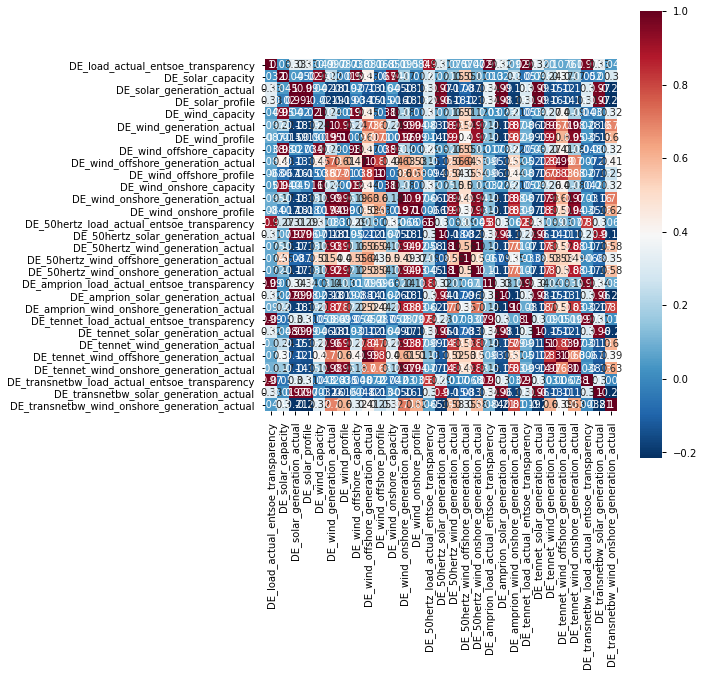

In [74]:
ts_DE_corr = ts_DE.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(ts_DE_corr, xticklabels=ts_DE_corr.columns, yticklabels=ts_DE_corr.columns, cmap='RdBu_r', annot=True, square = True)

<AxesSubplot:>

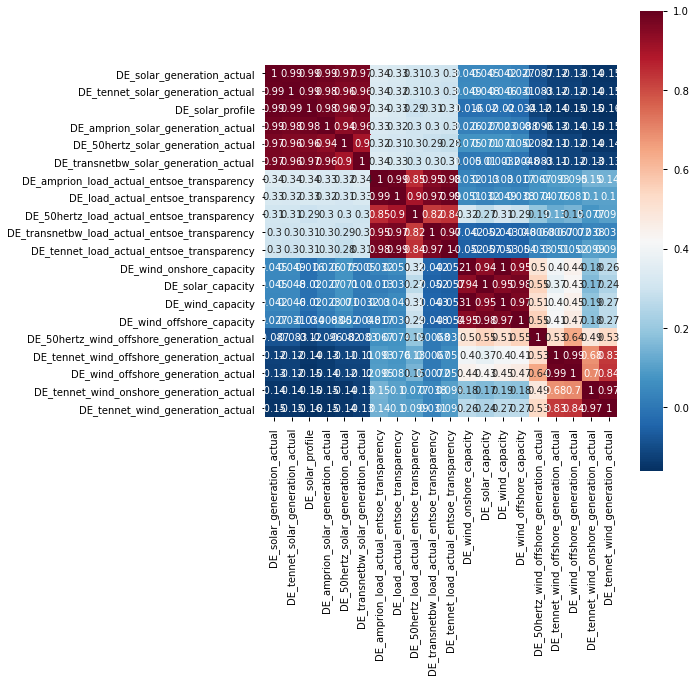

In [75]:
cols = ts_DE_corr.nlargest(20, 'DE_solar_generation_actual')['DE_solar_generation_actual'].index
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(ts_DE[cols].corr(), cmap='RdBu_r', square = True, annot=True)

In [45]:
ts_DE = ts_DE.merge(wt['utc_timestamp'], how = 'inner')

NameError: name 'wt' is not defined

/Users/napatseelpipat/opt/anaconda3/envs/dsprac/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


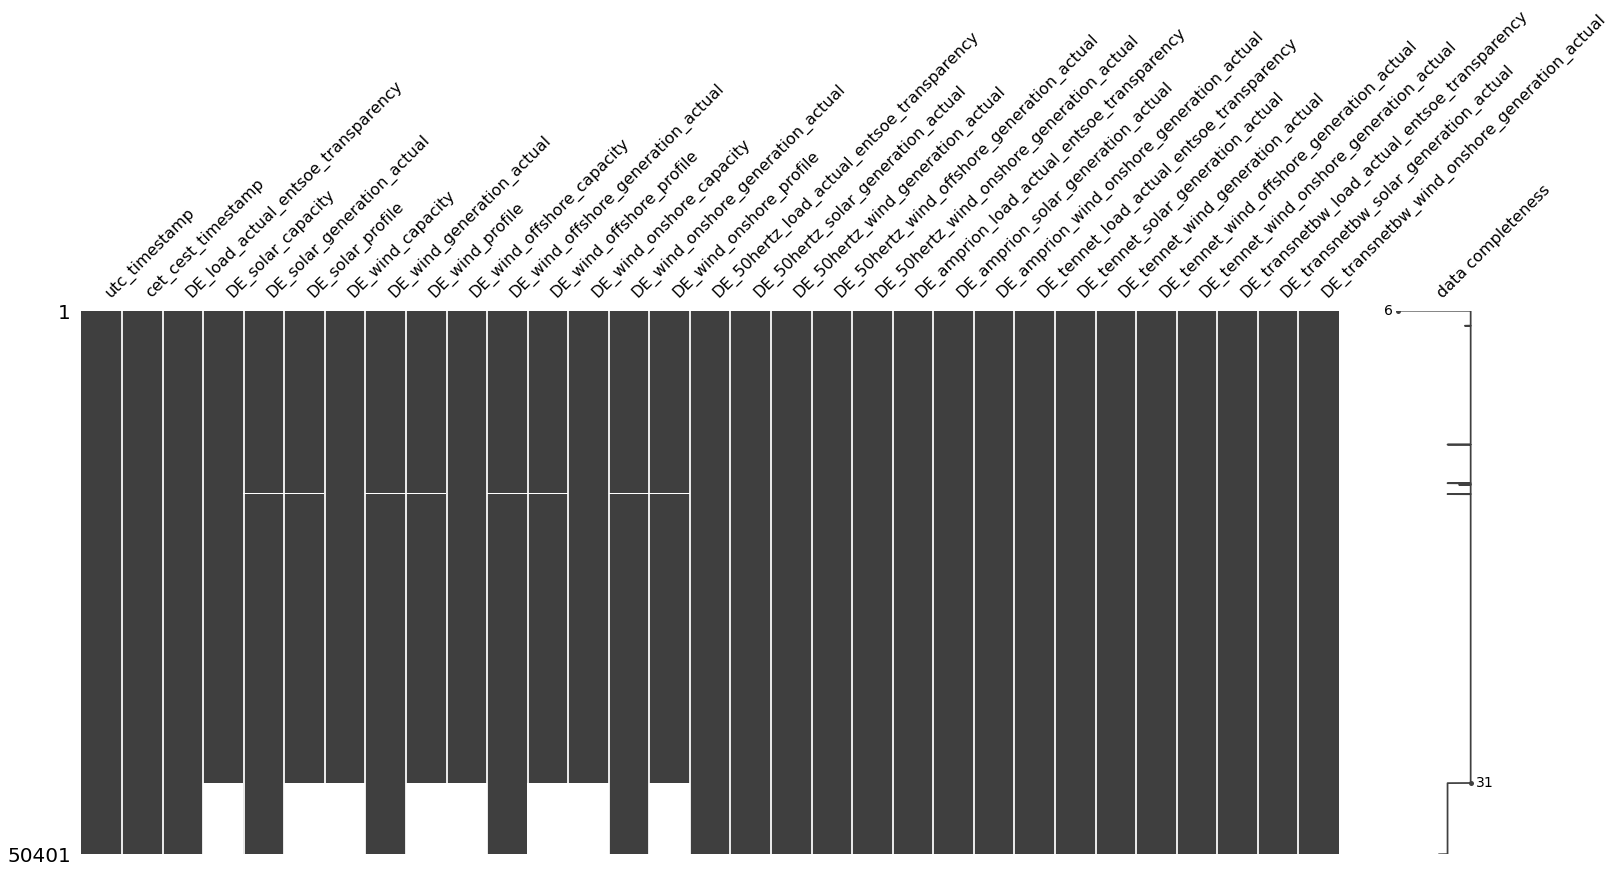

In [46]:
import missingno
missingno.matrix(ts_DE, labels = True)
plt.show()

In [47]:
ts_DE

,utc_timestamp,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,...,DE_amprion_solar_generation_actual,DE_amprion_wind_onshore_generation_actual,DE_tennet_load_actual_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,41151.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,...,NaN,857.0,13841.0,NaN,3866.0,469.0,3398.0,5307.0,NaN,5.0
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,40135.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,...,NaN,794.0,13267.0,NaN,3974.0,466.0,3508.0,5087.0,NaN,7.0
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,39106.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,...,NaN,826.0,12702.0,NaN,4194.0,470.0,3724.0,4906.0,NaN,8.0
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,38765.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,...,NaN,852.0,12452.0,NaN,4446.0,473.0,3973.0,4865.0,NaN,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50396,2020-09-30T19:00:00Z,2020-09-30T21:00:00+0200,57559.0,NaN,0.0,NaN,NaN,10654.0,NaN,NaN,...,NaN,1526.0,17719.0,0.0,8186.0,4628.0,3558.0,7657.0,NaN,164.0
50397,2020-09-30T20:00:00Z,2020-09-30T22:00:00+0200,54108.0,NaN,0.0,NaN,NaN,11836.0,NaN,NaN,...,NaN,1885.0,16984.0,0.0,8879.0,5056.0,3824.0,7072.0,NaN,242.0
50398,2020-09-30T21:00:00Z,2020-09-30T23:00:00+0200,49845.0,NaN,0.0,NaN,NaN,12168.0,NaN,NaN,...,NaN,2022.0,15549.0,0.0,8972.0,5165.0,3807.0,6465.0,NaN,257.0
50399,2020-09-30T22:00:00Z,2020-10-01T00:00:00+0200,46886.0,NaN,0.0,NaN,NaN,12533.0,NaN,NaN,...,NaN,2048.0,14595.0,0.0,9049.0,5123.0,3925.0,5963.0,NaN,304.0


In [48]:
ts_DE = ts_DE.dropna()

In [49]:
target_col = [i for i in ts_DE.columns if ('generation' in i) and ('LU' not in i)]

In [50]:
target = ts_DE[target_col]

In [61]:
features = ts_DE[[
    i for i in ts_DE 
    if (i not in target.columns) and
    i != 'DE_solar_profile'
]]

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(features.iloc[:,2:], target, test_size=0.3, random_state=4)

In [63]:
X_train.values.shape

(30585, 12)

In [64]:
y_train['DE_solar_generation_actual'].values.shape

(30585,)

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train.values,  y_train['DE_solar_generation_actual'].values)

LinearRegression()

In [66]:
lr.predict(X_train.values)

array([3060.42389687, 1338.40183306, 7032.18850801, ..., 3605.7195781 ,
       1481.59102276, 4968.61475196])

In [71]:
from sklearn.metrics import r2_score
r2_score(y_test['DE_solar_generation_actual'], lr.predict(X_test))  

0.2188247456956336

In [68]:
X_train

,DE_load_actual_entsoe_transparency,DE_solar_capacity,DE_wind_capacity,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_profile,DE_50hertz_load_actual_entsoe_transparency,DE_amprion_load_actual_entsoe_transparency,DE_tennet_load_actual_entsoe_transparency,DE_transnetbw_load_actual_entsoe_transparency
41207,43434.0,50098.0,49962.0,0.1607,5621.0,0.2742,44341.0,0.1463,9805.0,16186.0,12357.0,5086.0
16418,48356.0,39511.0,36155.0,0.4247,2533.0,0.9504,33622.0,0.3851,8737.0,18760.0,15509.0,5350.0
27198,63414.0,42374.0,43148.0,0.0640,3483.0,0.0104,39665.0,0.0688,11838.0,23704.0,19602.0,8271.0
39009,66451.0,49540.0,49387.0,0.1379,5243.0,0.2653,44144.0,0.1228,12362.0,25421.0,20156.0,8511.0
8688,41695.0,38608.0,32718.0,0.4810,2162.0,1.1951,30556.0,0.4305,7043.0,15702.0,13691.0,5259.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23452,44204.0,41224.0,40688.0,0.0657,3244.0,0.0934,37445.0,0.0633,8713.0,16711.0,13482.0,5298.0
11895,62498.0,38917.0,33986.0,0.3097,2244.0,0.6875,31742.0,0.2830,11963.0,22858.0,19404.0,8273.0
27169,52799.0,42364.0,43141.0,0.1635,3483.0,0.1695,39658.0,0.1629,10194.0,19758.0,16050.0,6797.0
8398,57874.0,38544.0,32295.0,0.4042,2162.0,0.8552,30132.0,0.3719,10267.0,21343.0,18674.0,7589.0


Feature: 0, Score: 1.06812
Feature: 1, Score: 0.60037
Feature: 2, Score: -77.08968
Feature: 3, Score: 13191.38494
Feature: 4, Score: 75.35733
Feature: 5, Score: -1784.44420
Feature: 6, Score: 76.95158
Feature: 7, Score: -19378.59989
Feature: 8, Score: -0.73098
Feature: 9, Score: 1.22021
Feature: 10, Score: -2.70902
Feature: 11, Score: -1.83332


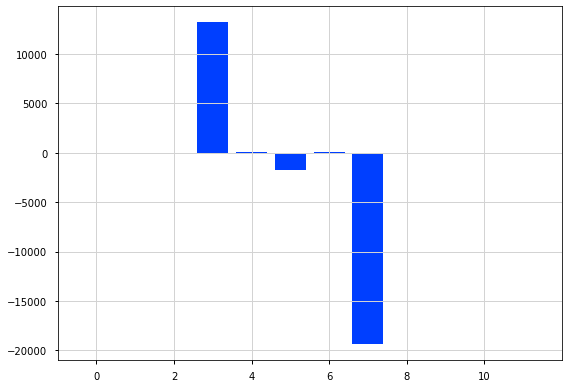

In [69]:
# get importance
importance = lr.coef_
# summarize feature importance
feat_imp=[]
for i,v in enumerate(importance):
    feat_imp.append((X_train.columns[i], v) )                                                      #index ยังไงดี
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [70]:
features

,utc_timestamp,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_solar_capacity,DE_wind_capacity,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_profile,DE_50hertz_load_actual_entsoe_transparency,DE_amprion_load_actual_entsoe_transparency,DE_tennet_load_actual_entsoe_transparency,DE_transnetbw_load_actual_entsoe_transparency
8,2015-01-01T07:00:00Z,2015-01-01T08:00:00+0100,41133.0,37248.0,27913.0,0.3657,667.0,0.7874,27246.0,0.3554,10685.0,13583.0,12569.0,4295.0
9,2015-01-01T08:00:00Z,2015-01-01T09:00:00+0100,42963.0,37248.0,27913.0,0.3593,667.0,0.7907,27246.0,0.3487,10620.0,14548.0,13154.0,4640.0
10,2015-01-01T09:00:00Z,2015-01-01T10:00:00+0100,45088.0,37248.0,27913.0,0.3780,667.0,0.7872,27246.0,0.3679,10746.0,15487.0,13962.0,4893.0
11,2015-01-01T10:00:00Z,2015-01-01T11:00:00+0100,47013.0,37248.0,27913.0,0.4080,667.0,0.7908,27246.0,0.3987,10856.0,16297.0,14771.0,5088.0
12,2015-01-01T11:00:00Z,2015-01-01T12:00:00+0100,48159.0,37248.0,27913.0,0.4336,667.0,0.7912,27246.0,0.4248,10635.0,17106.0,15016.0,5403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,2019-12-30T18:00:00Z,2019-12-30T19:00:00+0100,56927.0,50508.0,50452.0,0.6414,5742.0,0.8954,44710.0,0.6088,11917.0,20645.0,17836.0,6529.0
43796,2019-12-30T19:00:00Z,2019-12-30T20:00:00+0100,53959.0,50508.0,50452.0,0.6407,5742.0,0.8435,44710.0,0.6146,11391.0,19646.0,16638.0,6283.0
43797,2019-12-30T20:00:00Z,2019-12-30T21:00:00+0100,51937.0,50508.0,50452.0,0.6421,5742.0,0.9078,44710.0,0.6080,10964.0,19099.0,15758.0,6116.0
43798,2019-12-30T21:00:00Z,2019-12-30T22:00:00+0100,50574.0,50508.0,50452.0,0.6231,5742.0,0.9028,44710.0,0.5872,10707.0,18434.0,15465.0,5969.0


## Weather

In [23]:
wt = pd.read_csv('weather_data.csv')

In [28]:
wt.describe()

,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,CH_temperature,...,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
count,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000,...,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000
mean,7.778066,93.706084,66.977420,9.783023,81.329036,63.459002,10.905615,121.540706,64.480072,7.516642,...,68.287064,6.051774,59.320632,62.203629,9.299350,102.882347,62.914420,8.085738,93.237304,64.705110
std,9.067683,175.561727,90.385764,7.172334,165.637688,86.814030,9.912238,209.389553,86.530196,8.338395,...,89.907185,8.195672,125.784838,86.223147,9.023446,191.086460,86.273344,9.769178,177.362890,87.356797
min,-25.301000,0.000000,0.000000,-17.119000,0.000000,0.000000,-19.326000,0.000000,0.000000,-23.581000,...,0.000000,-23.776000,0.000000,0.000000,-20.669000,0.000000,0.000000,-27.075000,0.000000,0.000000
25%,0.582000,0.000000,0.000000,4.474000,0.000000,0.000000,2.954000,0.000000,0.000000,1.033000,...,0.000000,-0.075000,0.000000,0.000000,2.039000,0.000000,0.000000,0.292000,0.000000,0.000000
50%,7.673000,0.468550,7.159600,9.632000,0.203000,5.052000,10.898000,0.645750,8.446200,7.408000,...,7.826500,5.708000,0.225600,5.646550,9.298000,0.373600,6.471250,8.164000,0.359500,6.468950
75%,14.744000,98.262000,115.359875,14.983000,60.971500,109.778800,18.352250,160.324800,107.291475,13.932000,...,120.406850,12.754000,41.734375,110.510000,16.175000,109.257500,104.179650,15.668000,91.122775,111.578475
max,33.745000,890.054100,415.754100,37.918000,854.110600,409.918000,40.854000,934.065000,419.935900,31.812000,...,413.643500,28.717000,752.433200,365.843700,35.922000,912.309500,417.611100,35.827000,885.414500,406.255800


In [29]:
for i in wt.columns:
    print(i)

utc_timestamp
AT_temperature
AT_radiation_direct_horizontal
AT_radiation_diffuse_horizontal
BE_temperature
BE_radiation_direct_horizontal
BE_radiation_diffuse_horizontal
BG_temperature
BG_radiation_direct_horizontal
BG_radiation_diffuse_horizontal
CH_temperature
CH_radiation_direct_horizontal
CH_radiation_diffuse_horizontal
CZ_temperature
CZ_radiation_direct_horizontal
CZ_radiation_diffuse_horizontal
DE_temperature
DE_radiation_direct_horizontal
DE_radiation_diffuse_horizontal
DK_temperature
DK_radiation_direct_horizontal
DK_radiation_diffuse_horizontal
EE_temperature
EE_radiation_direct_horizontal
EE_radiation_diffuse_horizontal
ES_temperature
ES_radiation_direct_horizontal
ES_radiation_diffuse_horizontal
FI_temperature
FI_radiation_direct_horizontal
FI_radiation_diffuse_horizontal
FR_temperature
FR_radiation_direct_horizontal
FR_radiation_diffuse_horizontal
GB_temperature
GB_radiation_direct_horizontal
GB_radiation_diffuse_horizontal
GR_temperature
GR_radiation_direct_horizontal
GR_r

In [30]:
wt_DE_col = [i for i in wt.columns if 'DE' in i]
wt_DE_col = ['utc_timestamp'] + wt_DE_col
wt_DE = wt[wt_DE_col]

In [40]:
wt_DE

,utc_timestamp,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
0,2014-12-31 23:00:00,-0.940,0.0,0.0
1,2015-01-01 00:00:00,-0.981,0.0,0.0
2,2015-01-01 01:00:00,-1.035,0.0,0.0
3,2015-01-01 02:00:00,-1.109,0.0,0.0
4,2015-01-01 03:00:00,-1.166,0.0,0.0
...,...,...,...,...
43820,2019-12-31 19:00:00,0.767,0.0,0.0
43821,2019-12-31 20:00:00,0.656,0.0,0.0
43822,2019-12-31 21:00:00,0.476,0.0,0.0
43823,2019-12-31 22:00:00,0.226,0.0,0.0


In [32]:
wt_DE = wt_DE.merge(ts['utc_timestamp'], how = 'inner')

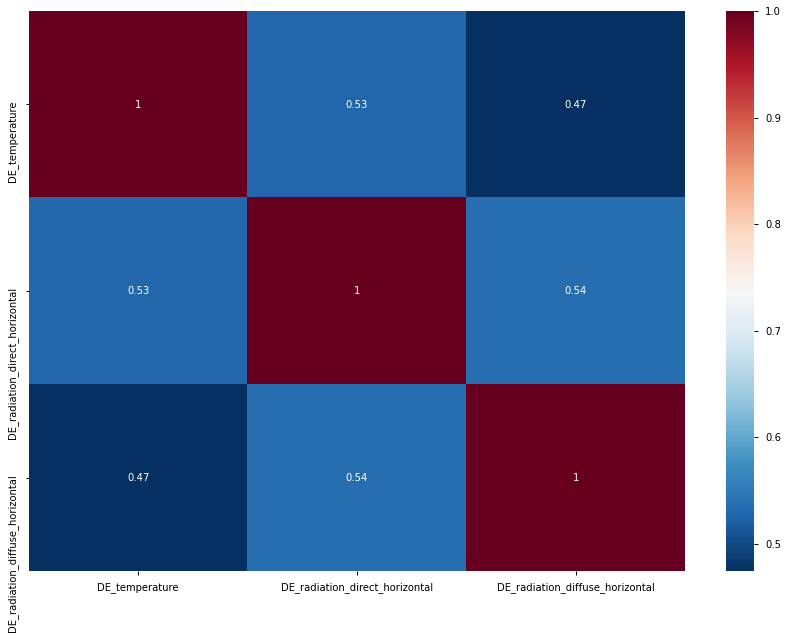

In [42]:
plt.subplots(figsize=(12,9))
sns.heatmap(wt_DE.corr(), xticklabels=wt_DE.columns[1:], yticklabels=wt_DE.columns[1:], cmap='RdBu_r', annot=True)
plt.show()

In [43]:
#change format utc_datetime to datetime
wt_DE['utc_timestamp'] = wt_DE['utc_timestamp'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))

TypeError: strptime() argument 1 must be str, not Timestamp

### columns plots

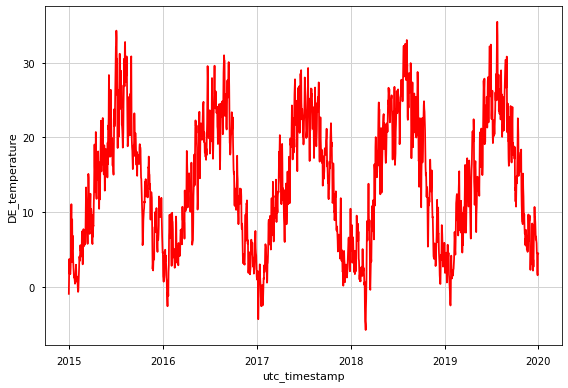

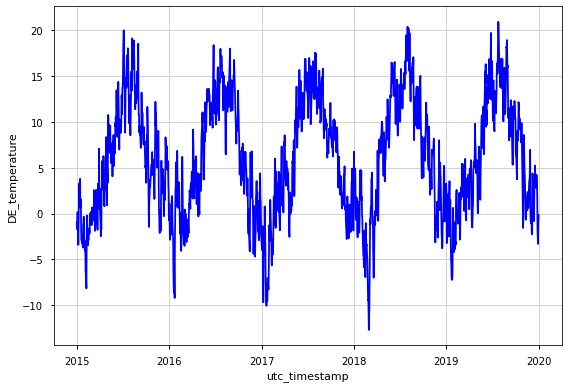

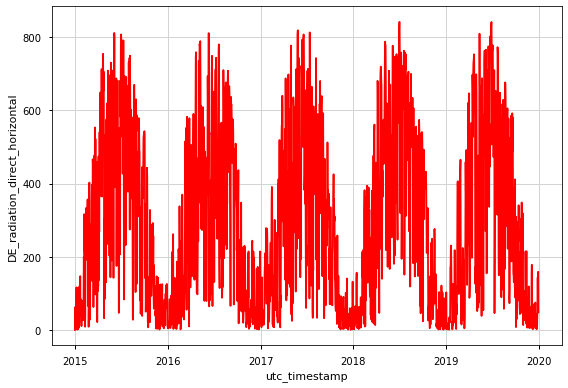

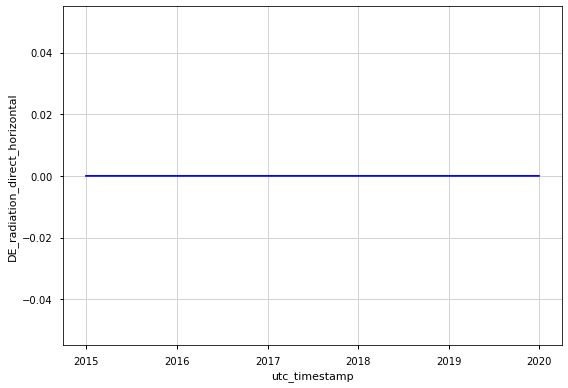

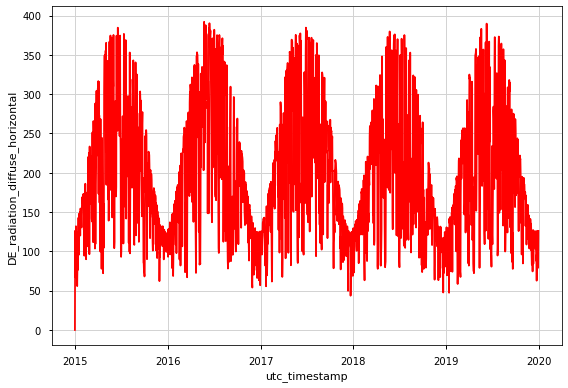

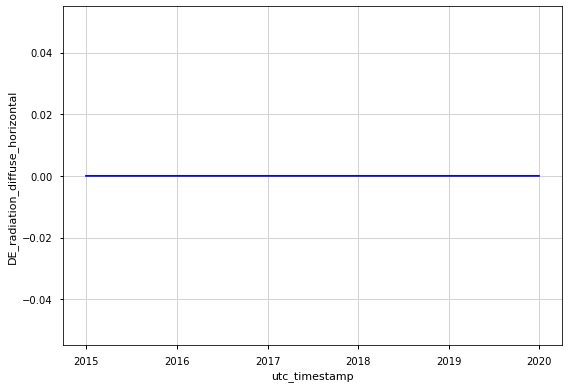

In [44]:
for i in wt_DE.columns[1:]:    
    wt_DE.groupby(wt_DE['utc_timestamp'].dt.date).agg('max')[i].plot(ylabel = i, c = 'red')
    plt.show()
    wt_DE.groupby(wt_DE['utc_timestamp'].dt.date).agg('min')[i].plot(ylabel = i, c = 'blue')
    plt.show()

### plot of radiation in 1 day

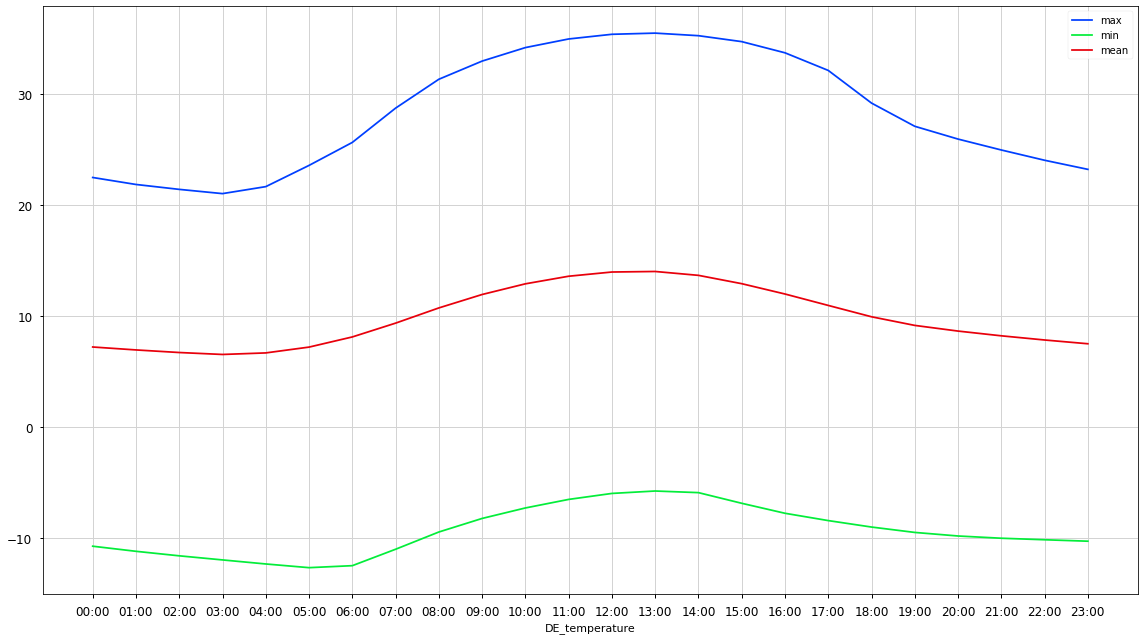

In [45]:
plt.figure(figsize = (16, 9),)
wt_DE.groupby(wt_DE['utc_timestamp'].dt.time)['DE_temperature'].agg('max').plot(xlabel = 'DE_temperature', fontsize = 12)
wt_DE.groupby(wt_DE['utc_timestamp'].dt.time)['DE_temperature'].agg('min').plot(xlabel = 'DE_temperature')
wt_DE.groupby(wt_DE['utc_timestamp'].dt.time)['DE_temperature'].agg('mean').plot(xlabel = 'DE_temperature')
plt.legend(['max', 'min', 'mean'])
plt.xticks(wt_DE['utc_timestamp'].dt.time.unique())
plt.show()

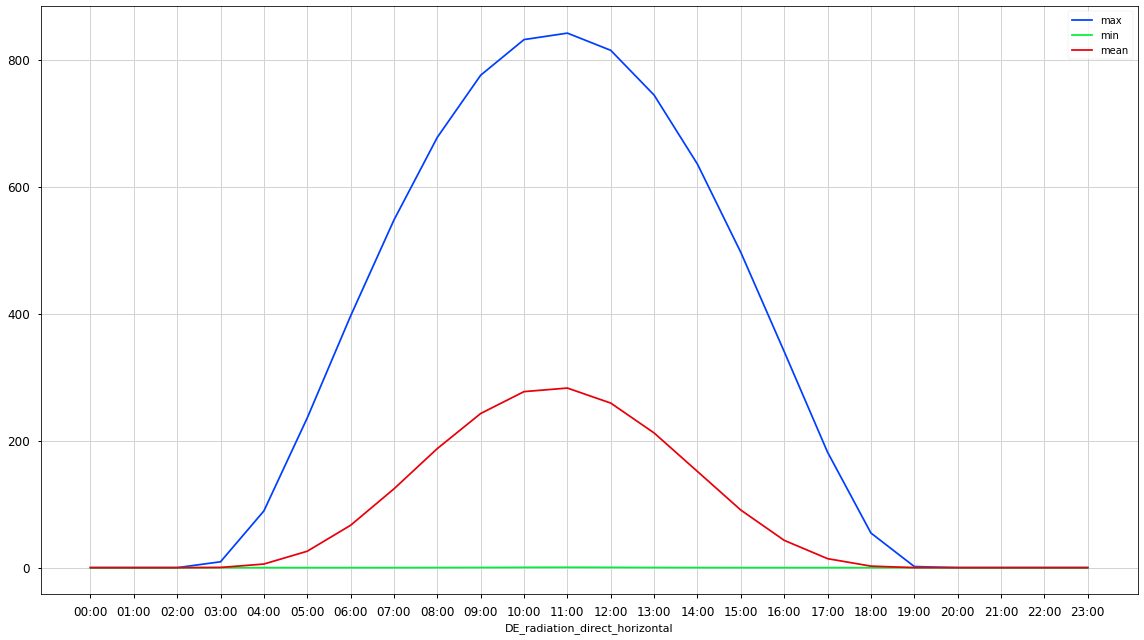

In [46]:
plt.figure(figsize = (16, 9),)
wt_DE.groupby(wt_DE['utc_timestamp'].dt.time)['DE_radiation_direct_horizontal'].agg('max').plot(xlabel = 'DE_radiation_direct_horizontal', fontsize = 12)
wt_DE.groupby(wt_DE['utc_timestamp'].dt.time)['DE_radiation_direct_horizontal'].agg('min').plot(xlabel = 'DE_radiation_direct_horizontal')
wt_DE.groupby(wt_DE['utc_timestamp'].dt.time)['DE_radiation_direct_horizontal'].agg('mean').plot(xlabel = 'DE_radiation_direct_horizontal')
plt.legend(['max', 'min', 'mean'])
plt.xticks(wt_DE['utc_timestamp'].dt.time.unique())
plt.show()

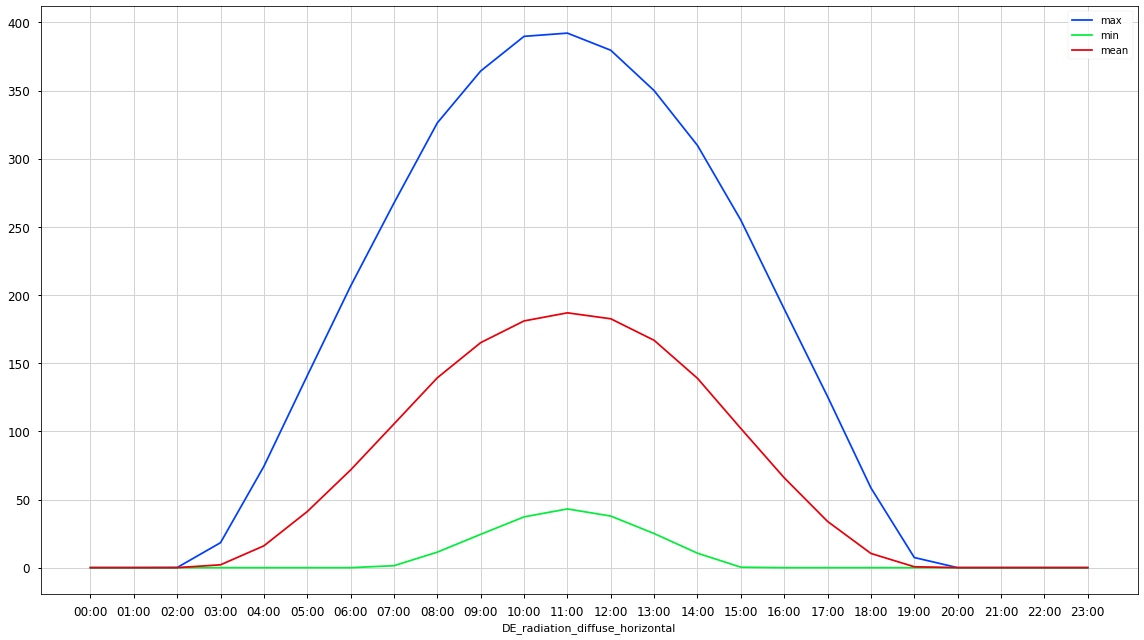

In [47]:
plt.figure(figsize = (16, 9),)
wt_DE.groupby(wt_DE['utc_timestamp'].dt.time)['DE_radiation_diffuse_horizontal'].agg('max').plot(xlabel = 'DE_radiation_diffuse_horizontal', fontsize = 12)
wt_DE.groupby(wt_DE['utc_timestamp'].dt.time)['DE_radiation_diffuse_horizontal'].agg('min').plot(xlabel = 'DE_radiation_diffuse_horizontal')
wt_DE.groupby(wt_DE['utc_timestamp'].dt.time)['DE_radiation_diffuse_horizontal'].agg('mean').plot(xlabel = 'DE_radiation_diffuse_horizontal')
plt.legend(['max', 'min', 'mean'])
plt.xticks(wt_DE['utc_timestamp'].dt.time.unique())
plt.show()